In [1]:
# Import Pandas library into the current environment, note that "pd" is an alias name for "Pandas" 
import pandas as pd

# The data contains 200+ columns so let's increase the maximum number of rows and columns to display 

# pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

# Let's ignore warnings
# Some operations might raise a warning and we want to ignore them
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# this command initializes Plotly in Jupyter Notebook 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [2]:
# Use Pandas to read financial data in "financial.csv" file which is included in the course package
df = pd.read_csv('financial_data.csv')

In [3]:
# Dataframe preview
df

,Company Name,Sector,Industry,Ticker,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last

In [4]:
# Let's display column names
df.columns.tolist()

['Company Name',
 'Sector',
 'Industry',
 'Ticker',
 'Report Date',
 'Currency',
 'Fiscal Year',
 'Fiscal Period',
 'Publish Date',
 'Restated Date',
 'Shares (Basic)',
 'Shares (Diluted)',
 'Revenue',
 'Cost of Revenue',
 'Gross Profit',
 'Operating Expenses',
 'Selling, General & Administrative',
 'Operating Income (Loss)',
 'Non-Operating Income (Loss)',
 'Interest Expense, Net',
 'Pretax Income (Loss), Adj.',
 'Pretax Income (Loss)',
 'Income Tax (Expense) Benefit, Net',
 'Income (Loss) from Continuing Operations',
 'Net Income',
 'Net Income (Common)',
 'Net Income/Starting Line',
 'Non-Cash Items',
 'Change in Working Capital',
 'Net Cash from Operating Activities',
 'Change in Fixed Assets & Intangibles',
 'Net Cash from Investing Activities',
 'Dividends Paid',
 'Cash from (Repayment of) Debt',
 'Cash from (Repurchase of) Equity',
 'Net Cash from Financing Activities',
 'Net Change in Cash',
 'Cash, Cash Equivalents & Short Term Investments',
 'Cash & Cash Equivalents',
 'Accou

In [5]:
# Let's view the number of unique stock ticker symbols available in the Pandas DataFrame
df['Ticker'].nunique()

8

In [6]:
# Let's view the names of unique stock ticker symbols available in the Pandas DataFrame
df['Ticker'].unique()

array(['AAPL', 'UNH', 'NVDA', 'XOM', 'GE', 'COST', 'JCI', 'ICE'],
      dtype=object)

In [7]:
# Let's display a statistical summary of the Pandas DataFrame
df.describe()

,Fiscal Year,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last 3 quarters,Net Profit Margin change from last 4 quarters,Return on Equity change from last quarte

# PERFORM DATA VISUALIZATION

In [8]:
apple_df = df[df['Ticker'] == 'AAPL'].reset_index(drop=True)

In [9]:
# We will focus our analysis on predicting the % Change in Quarterly EPS (Target Output)
# Let's Drop the "% Change in Quarterly Revenue (Target Output)" column

apple_df = apple_df.drop(columns = '% Change in Quarterly EPS (Target Output)')
apple_df

,Company Name,Sector,Industry,Ticker,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last

In [10]:
# Let's plot the histogram for the target column (output) for Apple
fig = px.histogram(apple_df['% Change in Quarterly Revenue (Target Output)'] * 100, nbins = 30)
fig.update_layout({'plot_bgcolor': "white"})

In [11]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 201 entries, Company Name to % Change in Quarterly Revenue (Target Output)
dtypes: float64(156), int64(36), object(9)
memory usage: 133.6+ KB


In [12]:
# Select only numeric columns (int or float)
numeric_columns = apple_df.select_dtypes(include=['int', 'float']).columns

# Create a new DataFrame with only numeric columns
numeric_df = apple_df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print or use the correlation matrix as needed
print(correlation_matrix)


                                               Fiscal Year  Shares (Basic)  \
Fiscal Year                                       1.000000       -0.749626   
Shares (Basic)                                   -0.749626        1.000000   
Shares (Diluted)                                 -0.788180        0.997914   
Revenue                                           0.932036       -0.756818   
Cost of Revenue                                  -0.935808        0.756822   
...                                                    ...             ...   
Net Debt / EBIT change from last quarter          0.096836       -0.171563   
Net Debt / EBIT change from last  2 quarters      0.183245       -0.205039   
Net Debt / EBIT change from last  3 quarters      0.292068       -0.253066   
Net Debt / EBIT change from last  4 quarters      0.319355       -0.210774   
% Change in Quarterly Revenue (Target Output)    -0.060554        0.048222   

                                               Shares (Diluted)

In [13]:
# Let's view correlation coefficients for every feature with the target output 
correlation_matrix[['% Change in Quarterly Revenue (Target Output)']]

,% Change in Quarterly Revenue (Target Output)
Fiscal Year,-0.060554
Shares (Basic),0.048222
Shares (Diluted),0.049014
Revenue,-0.213640
Cost of Revenue,0.209118
...,...
Net Debt / EBIT change from last quarter,-0.043514
Net Debt / EBIT change from last 2 quarters,0.033185
Net Debt / EBIT change from last 3 quarters,0.300812
Net Debt / EBIT change from last 4 quarters,-0.060724


In [14]:
# Let's sort the correlation values in a descending order
# Let's display the top 10 positively correlated features with the output (target column)
top_positive_corr = correlation_matrix[['% Change in Quarterly Revenue (Target Output)']].sort_values( '% Change in Quarterly Revenue (Target Output)', ascending = False)[:10]
top_positive_corr

,% Change in Quarterly Revenue (Target Output)
% Change in Quarterly Revenue (Target Output),1.000000
Dividend Payout Ratio,0.444468
Liabilities to Equity Ratio change from last quarter,0.417155
Net Debt / EBITDA change from last 3 quarters,0.317685
"Income Tax (Expense) Benefit, Net",0.302208
Net Debt / EBIT change from last 3 quarters,0.300812
Liabilities to Equity Ratio change from last 2 quarters,0.251515
Net Cash from Investing Activities,0.248066
Cost of Revenue,0.209118
Total Assets change from last quarter,0.172880


In [15]:
# Let's obtain the top 10 negatively correlated features with the output (target column)
top_negative_corr = correlation_matrix[['% Change in Quarterly Revenue (Target Output)']].sort_values('% Change in Quarterly Revenue (Target Output)')[:10]
top_negative_corr

,% Change in Quarterly Revenue (Target Output)
Sales Per Share change from last 3 quarters,-0.708467
Revenue change from last 3 quarters,-0.685084
Sales Per Share change from last 2 quarters,-0.492523
Revenue change from last 2 quarters,-0.488686
Gross Profit Margin change from last quarter,-0.353955
EBITDA change from last 3 quarters,-0.348854
Current Ratio change from last quarters,-0.340744
EBITDA change from last 2 quarters,-0.333536
Free Cash Flow,-0.306749
Free Cash Flow Per Share,-0.285149


In [16]:
# Let's display the top positively and negatively correlated features with the output 
apple_df[top_negative_corr.reset_index()['index'].tolist() + top_positive_corr.reset_index()['index'].tolist()]

,Sales Per Share change from last 3 quarters,Revenue change from last 3 quarters,Sales Per Share change from last 2 quarters,Revenue change from last 2 quarters,Gross Profit Margin change from last quarter,EBITDA change from last 3 quarters,Current Ratio change from last quarters,EBITDA change from last 2 quarters,Free Cash Flow,Free Cash Flow Per Share,% Change in Quarterly Revenue (Target Output),Dividend Payout Ratio,Liabilities to Equity Ratio change from last quarter,Net Debt / EBITDA change from last 3 quarters,"Income Tax (Expense) Benefit, Net",Net Debt / EBIT change from last 3 quarters,Liabilities to Equity Ratio change from last 2 quarters,Net Cash from Investing Activities,Cost of Revenue,Total Assets change from last quarter
0,-0.211262,-0.211230,0.464663,0.464747,0.093666,-0.333333,0.091960,-1.171717,-82000000,-0.00339,-0.016949,0.251461,-0.103608,0.570029,-26000000,1.093373,0.070228,10000000,-1041000000,-0.009625
1,0.439904,0.439921,0.013365,0.013277,0.024266,-1.209596,0.041968,4.928571,105000000,0.00434,-0.051724,0.251461,-0.065619,-5.771085,-28000000,-8.924526,-0.162429,-104000000,-1013000000,-0.008236
2,-0.039080,-0.039133,-0.067783,-0.067797,0.018349,2.428571,-0.014519,-0.294118,34000000,0.00140,0.087273,0.251461,0.014273,-0.691185,-15000000,-1.423517,-0.052283,-417000000,-953000000,0.016775
3,0.013458,0.013559,0.030885,0.031034,-0.108599,-0.161765,-0.051183,-0.313253,-80000000,-0.00330,-0.044147,0.251461,0.031125,0.222646,-15000000,0.537298,0.045842,-825000000,-1086000000,0.023195
4,-0.014524,-0.014483,0.039261,0.039273,0.000146,-0.506024,0.000092,-0.145833,-45000000,-0.00186,0.009797,0.251461,-0.022889,1.009783,-7000000,3.047505,0.007524,82000000,-1038000000,0.004630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.274618,0.258679,-0.265311,-0.269250,0.018515,0.542484,-0.069945,-0.255304,22793000000,1.35316,0.023651,0.173240,0.066480,0.812675,-2625000000,0.712310,-0.049470,3572000000,-46179000000,-0.021705
81,-0.227170,-0.251967,-0.048942,-0.069477,-0.025362,-0.260359,0.011922,-0.116337,24459000000,1.49216,0.486864,0.177120,0.104618,1.383286,-2697000000,1.485207,0.178054,835000000,-48186000000,0.064158
82,0.414096,0.383562,0.564055,0.522030,0.037185,0.458251,-0.034191,0.639031,54518000000,3.32595,-0.215152,0.107770,-0.057892,-0.220617,-6611000000,-0.246572,0.040670,-16106000000,-69702000000,0.086008
83,0.227545,0.194562,0.166963,0.166963,-0.000320,0.213592,-0.106927,0.221886,33279000000,2.03023,-0.147197,0.143740,-0.022455,-0.061165,-5129000000,-0.083083,-0.079047,-9265000000,-54719000000,-0.080088


In [17]:
# Let's re-calculate the correlation matrix to only calculate the top 10 positively and negatively correlated features 
correlation_matrix = apple_df[top_negative_corr.reset_index()['index'].tolist() + 
                              top_positive_corr.reset_index()['index'].tolist()].corr()
correlation_matrix

,Sales Per Share change from last 3 quarters,Revenue change from last 3 quarters,Sales Per Share change from last 2 quarters,Revenue change from last 2 quarters,Gross Profit Margin change from last quarter,EBITDA change from last 3 quarters,Current Ratio change from last quarters,EBITDA change from last 2 quarters,Free Cash Flow,Free Cash Flow Per Share,% Change in Quarterly Revenue (Target Output),Dividend Payout Ratio,Liabilities to Equity Ratio change from last quarter,Net Debt / EBITDA change from last 3 quarters,"Income Tax (Expense) Benefit, Net",Net Debt / EBIT change from last 3 quarters,Liabilities to Equity Ratio change from last 2 quarters,Net Cash from Investing Activities,Cost of Revenue,Total Assets change from last quarter
Sales Per Share change from last 3 quarters,1.000000,0.996230,0.717850,0.727136,0.393471,0.634532,0.171276,0.602892,0.251441,0.221450,-0.708467,-0.492796,-0.381674,-0.295096,-0.211939,-0.230330,-0.212421,-0.286357,-0.094941,0.208011
Revenue change from last 3 quarters,0.996230,1.000000,0.704127,0.717826,0.392122,0.646556,0.171050,0.603820,0.196772,0.166963,-0.685084,-0.479941,-0.393980,-0.296563,-0.156003,-0.235629,-0.239922,-0.279009,-0.029724,0.241546
Sales Per Share change from last 2 quarters,0.717850,0.704127,1.000000,0.998507,0.354147,0.429503,0.059559,0.575717,0.419215,0.375511,-0.492523,-0.623671,-0.265890,-0.088652,-0.333287,-0.042927,0.154011,-0.356586,-0.199297,0.312572
Revenue change from last 2 quarters,0.727136,0.717826,0.998507,1.000000,0.356915,0.444093,0.063613,0.581601,0.386057,0.342373,-0.488686,-0.619886,-0.280429,-0.094022,-0.299805,-0.049922,0.132635,-0.353568,-0.159642,0.330327
Gross Profit Margin change from last quarter,0.393471,0.392122,0.354147,0.356915,1.000000,0.322856,0.349209,0.309654,0.080566,0.081936,-0.353955,-0.201874,-0.465255,-0.049705,-0.049838,-0.068088,-0.250640,-0.061061,-0.001523,-0.102893
EBITDA change from last 3 quarters,0.634532,0.646556,0.429503,0.444093,0.322856,1.000000,0.144891,0.426511,-0.076821,-0.074378,-0.348854,-0.264091,-0.277721,-0.192156,0.128746,-0.107799,-0.190120,-0.077627,0.190414,0.192848
Current Ratio change from last quarters,0.171276,0.171050,0.059559,0.063613,0.349209,0.144891,1.000000,0.092655,-0.079918,-0.084555,-0.340744,0.021484,-0.642916,-0.074982,0.027871,-0.005111,-0.500602,0.156976,0.042008,-0.434091
EBITDA change from last 2 quarters,0.602892,0.603820,0.575717,0.581601,0.309654,0.426511,0.092655,1.000000,0.090145,0.078649,-0.333536,-0.354105,-0.260908,-0.228061,-0.018491,-0.246073,-0.057376,-0.150599,0.059491,0.161946
Free Cash Flow,0.251441,0.196772,0.419215,0.386057,0.080566,-0.076821,-0.079918,0.090145,1.000000,0.980592,-0.306749,-0.507218,0.045168,0.083009,-0.921987,0.150221,0.237132,-0.407935,-0.905240,-0.081634
Free Cash Flow Per Share,0.221450,0.166963,0.375511,0.342373,0.081936,-0.074378,-0.084555,0.078649,0.980592,1.000000,-0.285149,-0.545149,0.044283,0.110380,-0.863878,0.167143,0.220463,-0.330617,-0.922196,-0.132513


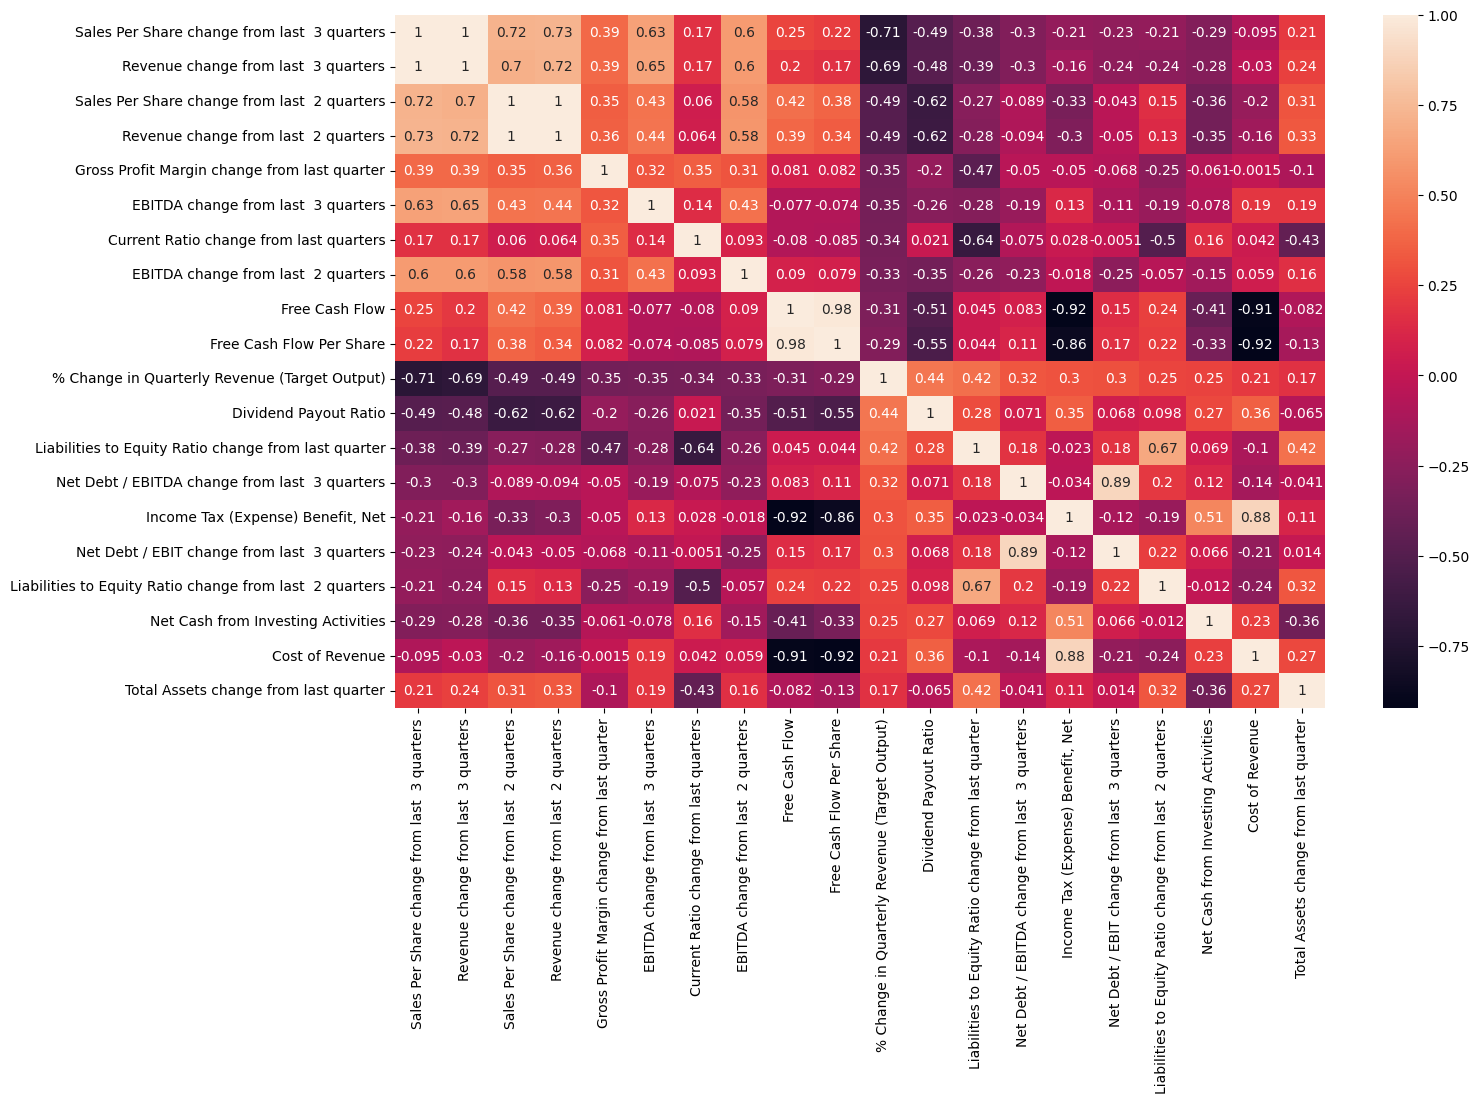

In [18]:
# Let's use Seaborn to display a heatmap for the correlation matrix
f, ax = plt.subplots(figsize = (15, 9))
sns.heatmap(correlation_matrix, annot = True);

# PERFORM ONE-HOT ENCODING

In [19]:
# Let's display Pandas DataFrame information
# Note that "Publish Date" column is listed as object data type
apple_df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 201 columns):
 #    Column                                                        Dtype  
---   ------                                                        -----  
 0    Company Name                                                  object 
 1    Sector                                                        object 
 2    Industry                                                      object 
 3    Ticker                                                        object 
 4    Report Date                                                   object 
 5    Currency                                                      object 
 6    Fiscal Year                                                   int64  
 7    Fiscal Period                                                 object 
 8    Publish Date                                                  object 
 9    Restated Date                                         

In [20]:
# Let's convert "Publish Date" column to datetime
# Python has a module dedicated to deal with date and time data known as datetime
apple_df['Publish Date'] = pd.to_datetime(apple_df['Publish Date'])

In [21]:
# Let's display the Pandas DataFrame information
apple_df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 201 columns):
 #    Column                                                        Dtype         
---   ------                                                        -----         
 0    Company Name                                                  object        
 1    Sector                                                        object        
 2    Industry                                                      object        
 3    Ticker                                                        object        
 4    Report Date                                                   object        
 5    Currency                                                      object        
 6    Fiscal Year                                                   int64         
 7    Fiscal Period                                                 object        
 8    Publish Date                                                

In [22]:
# Sorting the DataFrame in an ascending order based on the "Publish Date" column 
apple_df.sort_values(by = 'Publish Date', ascending = True, inplace = True)
apple_df

,Company Name,Sector,Industry,Ticker,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last

In [23]:
# Let's drop the following columns from the Pandas DataFrame
cols_to_drop = ['Ticker','Sector', 'Industry','Company Name', 'Report Date', 'Currency',
                'Fiscal Year', 'Publish Date', 'Restated Date']

apple_df = apple_df.drop(columns = cols_to_drop)
apple_df

,Fiscal Period,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last 3 quarters,Net Profit Margin change from last 4 quarters,Return on Equity change from last quar

In [24]:
# Let's perform one-hot encoding to the "Fiscal Period" column

# Let's display the original "Fiscal Period" column
print(apple_df['Fiscal Period'])

# Let's display the one-hot encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(apple_df['Fiscal Period'])
fiscal_encoded

0     Q3
1     Q4
2     Q1
3     Q2
4     Q3
      ..
80    Q3
81    Q4
82    Q1
83    Q2
84    Q3
Name: Fiscal Period, Length: 85, dtype: object


,Q1,Q2,Q3,Q4
0,False,False,True,False
1,False,False,False,True
2,True,False,False,False
3,False,True,False,False
4,False,False,True,False
...,...,...,...,...
80,False,False,True,False
81,False,False,False,True
82,True,False,False,False
83,False,True,False,False


In [25]:
# Drop the 'Fiscal Period' column from the Pandas DataFrame
apple_df = apple_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one-hot encoded "Fiscal Period" column
apple_df = pd.concat([apple_df, fiscal_encoded], axis = 1)
apple_df

,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last 3 quarters,Net Profit Margin change from last 4 quarters,Return on Equity change from last quarter,Return on 

# SPLIT THE DATA INTO TRAINING AND TESTING

In [26]:
# Split the data into inputs "X" and outputs "y"
X = apple_df.drop('% Change in Quarterly Revenue (Target Output)', axis = 1)
y = apple_df['% Change in Quarterly Revenue (Target Output)']

In [27]:
# Let's view the inputs 
X

,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last 3 quarters,Net Profit Margin change from last 4 quarters,Return on Equity change from last quarter,Return on 

In [28]:
# Let's view the outputs
y

0    -0.016949
1    -0.051724
2     0.087273
3    -0.044147
4     0.009797
        ...   
80    0.023651
81    0.486864
82   -0.215152
83   -0.147197
84    0.086633
Name: % Change in Quarterly Revenue (Target Output), Length: 85, dtype: float64

In [29]:
# Let's perform data train/test split
# Shuffling means randomly reordering the elements in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [30]:
# Check out the shape of input data after train/test split operation 
print(X_train.shape, X_test.shape)

(59, 194) (26, 194)


In [31]:
# Check out the shape of output data after train/test split operation 
print(y_train.shape, y_test.shape)

(59,) (26,)


In [32]:
# Display the training set 
# Note that no data shuffling took place because it has been disabled by setting "shuffle = False"
X_train

,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Income,Net Income (Common),Net Income/Starting Line,Non-Cash Items,Change in Working Capital,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,"Cash, Cash Equivalents & Short Term Investments",Cash & Cash Equivalents,Accounts & Notes Receivable,"Accounts Receivable, Net",Inventories,Other Short Term Assets,Misc. Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Goodwill,Misc. Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Accounts Payable,Other Payables & Accruals,Short Term Debt,Other Short Term Liabilities,Total Current Liabilities,Long Term Debt,Other Long Term Liabilities,Misc. Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity,Total Liabilities & Equity,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Dividend Payout Ratio,Net Debt / EBITDA,Net Debt / EBIT,Shares (Basic) change from last quarter,Shares (Basic) change from last 2 quarters,Shares (Basic) change from last 3 quarters,Shares (Basic) change from last 4 quarters,Shares (Diluted) change from last quarter,Shares (Diluted) change from last 2 quarters,Shares (Diluted) change from last 3 quarters,Shares (Diluted) change from last 4 quarters,Revenue change from last quarter,Revenue change from last 2 quarters,Revenue change from last 3 quarters,Revenue change from last 4 quarters,Operating Income (Loss) change from last quarter,Operating Income (Loss) change from last 2 quarters,Operating Income (Loss) change from last 3 quarters,Operating Income (Loss) change from last 4 quarters,Net Income change from last quarter,Net Income change from last 2 quarters,Net Income change from last 3 quarters,Net Income change from last 4 quarters,Total Assets change from last quarter,Total Assets change from last 2 quarters,Total Assets change from last 3 quarters,Total Assets change from last 4 quarters,Total Liabilities & Equity change from last quarter,Total Liabilities & Equity change from last 2 quarters,Total Liabilities & Equity change from last 3 quarters,Total Liabilities & Equity change from last 4 quarters,EBITDA change from last quarter,EBITDA change from last 2 quarters,EBITDA change from last 3 quarters,EBITDA change from last 4 quarters,Free Cash Flow change from last quarter,Free Cash Flow change from last 2 quarters,Free Cash Flow change from last 3 quarters,Free Cash Flow change from last 4 quarters,Gross Profit Margin change from last quarter,Gross Profit Margin change from last 2 quarters,Gross Profit Margin change from last 3 quarters,Gross Profit Margin change from last 4 quarters,Operating Margin change from last quarter,Operating Margin change from last 2 quarters,Operating Margin change from last 3 quarters,Operating Margin change from last 4 quarters,Net Profit Margin change from last quarter,Net Profit Margin change from last 2 quarters,Net Profit Margin change from last 3 quarters,Net Profit Margin change from last 4 quarters,Return on Equity change from last quarter,Return on 

# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [33]:
# Import linear_model from Scikit-Learn Library 
from sklearn import linear_model

# Train a linear regression model using Scikit-Learn Library
# First we instantiate an object out of our linear_model class
# Then we apply the fit() method to fit the model to the training dataset (X_train, y_trian)
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# After the regression model is trained, we evaluate its performance on the testing dataset
# Note that the testing dataset has never been seen by the model during training
# Now we can compare y_predict vs. the actual output y_test (ground truth data)
y_predict = linear_regression_model.predict(X_test)

In [35]:
# Let's generate various regression metrics by comparing "y_predict" to actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 363.5354325006162 
Mean Squared Error (MSE) = 132158.01068341007 
Mean Absolute Error (MAE) = 291.65316920598167


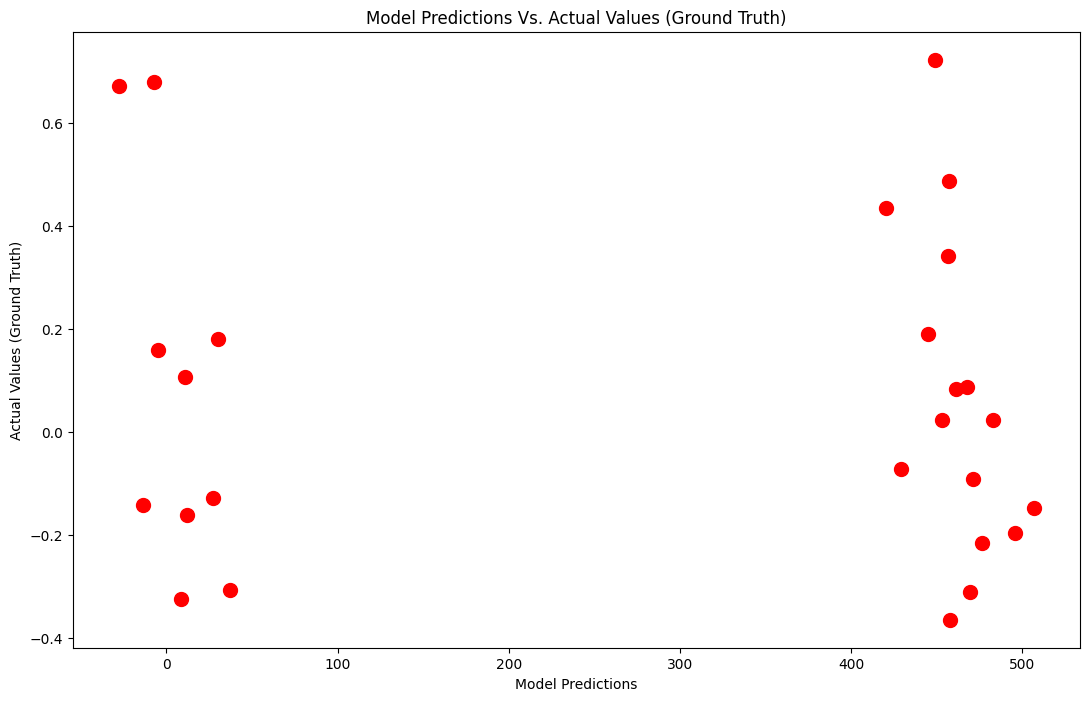

In [36]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

In [37]:
# Display the trained model Y-intercept
print(linear_regression_model.intercept_)

# Display the estimated coefficients for the linear regression problem
print(linear_regression_model.coef_)

-9.015133585290599
[ 6.19839769e-10  7.73883606e-10 -9.76473769e-08 -9.71849967e-08
  6.25305169e-08 -4.07896268e-08  9.21767370e-09 -9.17752803e-08
  2.24539045e-08  8.19499576e-09  9.80512113e-09 -1.16002640e-07
 -4.53071219e-08  9.51978631e-09 -3.12359123e-08  7.10023287e-07
 -4.53120182e-07  1.41707430e-07  1.00782172e-07 -1.27746387e-07
 -4.07732338e-08  1.44374335e-08  5.32957165e-09  2.99632771e-10
  1.41495535e-10  1.46930617e-08 -1.43730519e-08 -9.57649162e-09
 -1.75431390e-10  4.50923639e-09 -1.48647265e-08 -6.86412426e-09
 -9.54160910e-09 -5.29507113e-10 -1.78899988e-09  7.06073988e-10
  1.19209319e-09 -1.40193046e-09 -2.82262483e-10 -1.14082302e-08
 -2.35667766e-09 -1.67784807e-08  1.73315508e-08  1.69759133e-08
  5.75119742e-10 -2.19201999e-11  8.22281401e-09 -2.33530642e-08
 -2.26878459e-08 -3.49555432e-10  3.10904161e-08  8.70072027e-09
  6.65100851e-09  6.31791268e-09  4.69257887e-09  5.27510932e-09
  5.27510862e-09 -3.26729633e-09  1.01074137e-07  2.53350692e-10
  4.15

# TRAIN AND EVALUATE A RANDOM FOREST ALGORITHM

In [38]:
# Import Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
# n_estimators: represents the number of trees in the forest
# max_depth: represents the maximum depth of the tree
random_forest_model = RandomForestRegressor(n_estimators = 5, max_depth = 10);
random_forest_model.fit(X_train, y_train);

In [39]:
# Evaluate trained Random Forest Regression model
y_predict = random_forest_model.predict(X_test)

In [40]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.14506190417149914 
Mean Squared Error (MSE) = 0.0210429560418612 
Mean Absolute Error (MAE) = 0.11770923478461538


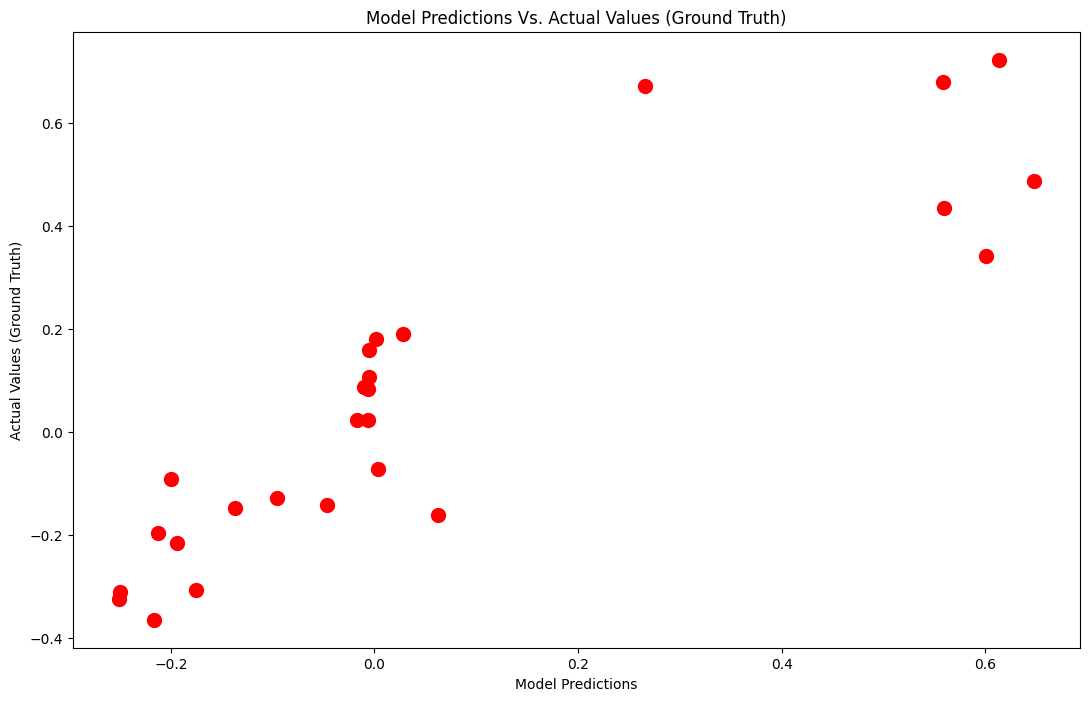

In [41]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK TO SOLVE REGRESSION PROBLEMS

In [42]:
# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras


In [43]:
# Let's perform input data scaling using MinMaxScaler() from Scikit-Learn library 
# Data scaling is an important pre-processing step in Artificial Neural Networks training 
# It improves model performance and speed up the training process
# Scaling works by normalizing features so they can have similar ranges and distributions so no feature dominates other features  
# Note that tree-based algorithms do not require data scaling
# MinMaxScaler scales the data to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();
scaler.fit(X_train);

In [44]:
# Apply data scaling to the training and testing datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Let's view the scaled training set
X_train_scaled 

array([[0.48428541, 0.60515843, 0.00134234, ..., 0.        , 1.        ,
        0.        ],
       [0.48428541, 0.60515843, 0.00100675, ..., 0.        , 0.        ,
        1.        ],
       [0.48428541, 0.60515843, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16785406, 0.17166508, 0.64740862, ..., 0.        , 1.        ,
        0.        ],
       [0.08638952, 0.08478128, 0.67285931, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
# Let's perform output data scaling 
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(y_train))

# Apply data scaling to the training and testing datasets
y_train_scaled = scaler.transform(pd.DataFrame(y_train))
y_test_scaled = scaler.transform(pd.DataFrame(y_test))

In [47]:
# Size of the input dataset
X_train.shape[1]

194

In [48]:
# Let's build our ANN using Keras API 
# Keras sequential model allows for building ANNs which consist of sequential layers (input, hidden..etc.)
# Dense means each neuron in the layer is fully connected to all the neurons in the previous layer  
# Normalization layer normalizes its inputs by applies a transformation to maintain the mean output close to 0 
# and standard deviation close to 1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout

ANN_model = Sequential()
ANN_model.add(Normalization(input_shape = [X_train.shape[1],], axis = None))
ANN_model.add(Dense(1024, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(512, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(32, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(units = 1, activation = 'linear'))

In [49]:
# Let's obtain the model summary
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 194)               3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 1024)              199680    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

In [50]:
# Let's compile the model
# Adam optimizer is the extended version of stochastic gradient descent algorithm 
# It works well in deep learning applications and ANNs training 
ANN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'mean_squared_error')

# Let's fit the model using 500 epochs
history = ANN_model.fit(X_train_scaled, y_train_scaled, epochs = 500)

Epoch 1/500

2/2 [==============================] - 4s 25ms/step - loss: 0.8417
Epoch 2/500
2/2 [==============================] - 0s 20ms/step - loss: 0.8409
Epoch 3/500
2/2 [==============================] - 0s 20ms/step - loss: 0.8299
Epoch 4/500
2/2 [==============================] - 0s 18ms/step - loss: 0.7967
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 0.7214
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 0.8725
Epoch 7/500
2/2 [==============================] - 0s 20ms/step - loss: 0.5710
Epoch 8/500
2/2 [==============================] - 0s 16ms/step - loss: 0.6394
Epoch 9/500
2/2 [==============================] - 0s 32ms/step - loss: 0.6806
Epoch 10/500
2/2 [==============================] - 0s 45ms/step - loss: 0.6927
Epoch 11/500
2/2 [==============================] - 0s 51ms/step - loss: 0.5452
Epoch 12/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5295
Epoch 13/500
2/2 [==============================

In [51]:
# Let's generate model predictions using the testing dataset and then scale the data back to its original range values
y_predict_scaled = ANN_model.predict(X_test_scaled)
y_predict = scaler.inverse_transform(y_predict_scaled)
y_test = scaler.inverse_transform(y_test_scaled)

1/1 [==============================] - 0s 496ms/step


In [52]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.2877702726944675 
Mean Squared Error (MSE) = 0.08281172984664817 
Mean Absolute Error (MAE) = 0.22527764314840243


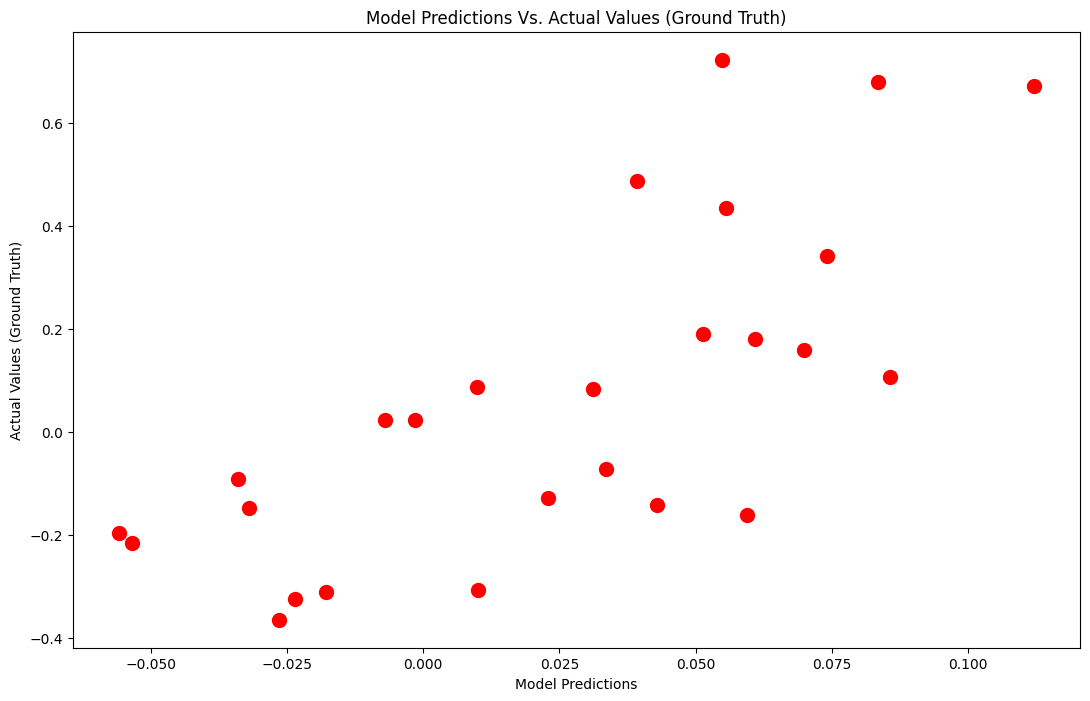

In [53]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN XGBOOST MODEL

In [54]:
# Import XGBoost
import xgboost as xgb

In [55]:
# Train an XGBoost regressor model 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             learning_rate = 0.1, 
                             max_depth = 3, 
                             n_estimators = 200);
xgb_model.fit(X_train, y_train);

In [56]:
# Make predictions on the test data
y_predict = xgb_model.predict(X_test)
y_predict

array([ 0.0915549 ,  0.01213922,  0.51923114, -0.2647529 ,  0.03256037,
        0.04569988,  0.58129025, -0.16422173, -0.00409916,  0.01620112,
        0.58669657, -0.1648339 ,  0.00810449,  0.02311258,  0.5593822 ,
       -0.1714481 ,  0.00882772,  0.07546706,  0.48460865, -0.14964783,
       -0.0881293 ,  0.0560329 ,  0.5719584 , -0.16495349,  0.0360399 ,
        0.05683483], dtype=float32)

In [57]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.1373041670710374 
Mean Squared Error (MSE) = 0.018852434295071354 
Mean Absolute Error (MAE) = 0.11650147747960513


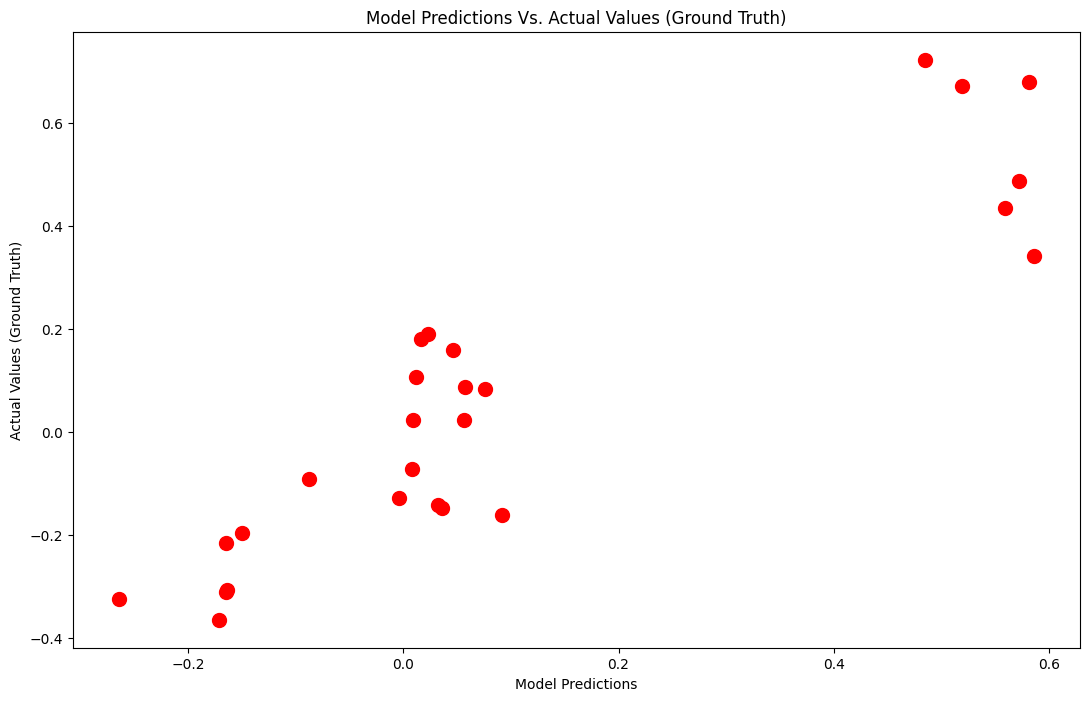

In [58]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# PERFORM HYPERPARAMETERS OPTIMIZATION

In [59]:
# GridSearchCV performs exhaustive search over a specified list of parameters
# You provide the algorithm with the hyperparameters and values you would like to experiment with 
# Note that you will have the following number of combinations: 4 * 4 * 4 * 3 = 192
# We will run each combination 5 times since we set the cross validation = 5
# Total number of runs = 192 * 5 = 960 fits

from sklearn.model_selection import GridSearchCV

In [60]:
# Specify the parameters grid
parameters_grid = {'max_depth': [1, 3, 5, 10],
                   'learning_rate': [0.01, 0.1, 0.5, 1],
                   'n_estimators': [10, 50, 100, 200],
                   'subsample': [0.5, 0.75, 1.0]} 

In [61]:
# Note that "neg_mean_squared_error" is used for scoring since our goal is to minimize the error
# GridSearchCV() ranks all algorithms (estimators) and specifies which one is the best
# cv stands for the number of cross-validation folds which is set to 5 by default
# Verbose controls the verbosity: the higher the number, the more messages to be displayed

xgb_gridsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [62]:
# Let's fit the model
xgb_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.5;, score=-0.010 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.5;, score=-0.063 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.5;, score=-0.059 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.5;, score=-0.069 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.5;, score=-0.113 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.75;, score=-0.010 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.75;, score=-0.062 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=10, subsample=0.75;, score=-0.057 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=1, 

In [63]:
# Indicate best parameters after grid search optimization
xgb_gridsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [64]:
# Display the best estimator values
xgb_gridsearch.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
# Generate predictions based on the optimal model parameters
y_predict = xgb_gridsearch.predict(X_test)
y_predict

array([ 0.02472107,  0.01410163,  0.4170178 , -0.25977236, -0.04213566,
        0.06121715,  0.46534327, -0.24238317,  0.05341711,  0.07604338,
        0.48370004, -0.17920546, -0.06337053,  0.03104769,  0.29105464,
       -0.24457559,  0.01597193,  0.02695176,  0.39400026, -0.13559188,
       -0.15582141,  0.05432441,  0.43488196, -0.2314851 , -0.10423933,
       -0.03719773], dtype=float32)

In [66]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.1336988046514594 
Mean Squared Error (MSE) = 0.017875370365229102 
Mean Absolute Error (MAE) = 0.1097305002593924


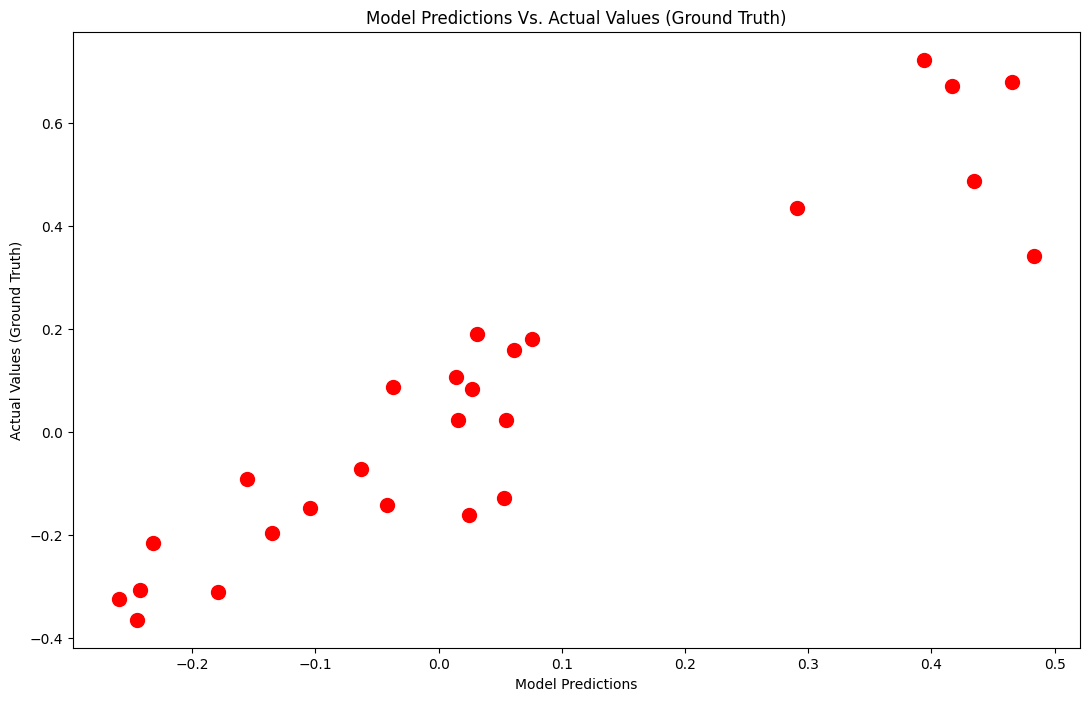

In [67]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');